# Cellular Automatons / Nubots Playground

This file is meant as a playground for the programming project biophysics/ cellular automata

#### Ideas/ Suggestions:

- Simple shapes to start with
- Probabilistic automata
- Methods from [the paper](https://dna.hamilton.ie/woods/download/nubots.pdf)
- Maybe try different lattices (e.g. 'sparse' lattices)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import random as rd

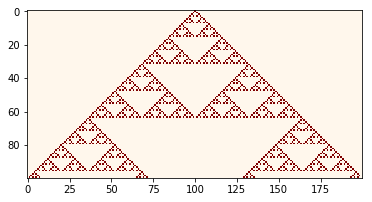

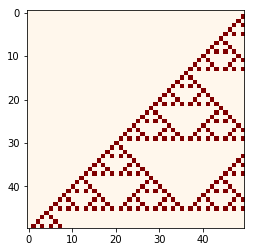

In [2]:
# Sierpinski triangles

N = 200
t = 100

field = np.zeros((t, N))
field[0, int(N/2)] = 1

for i in range(0, t - 1):
    for x in range(1, N - 1):
        field[i+1, x] = bool(field[i, x-1]) ^ bool(field[i, x+1]) #logical XOR

plt.imshow(field, cmap="OrRd")
plt.show()
plt.imshow(field[50:,:50], cmap="OrRd")
plt.show()
#plt.savefig('sierpinski_automaton.png', dpi=300, format='png')

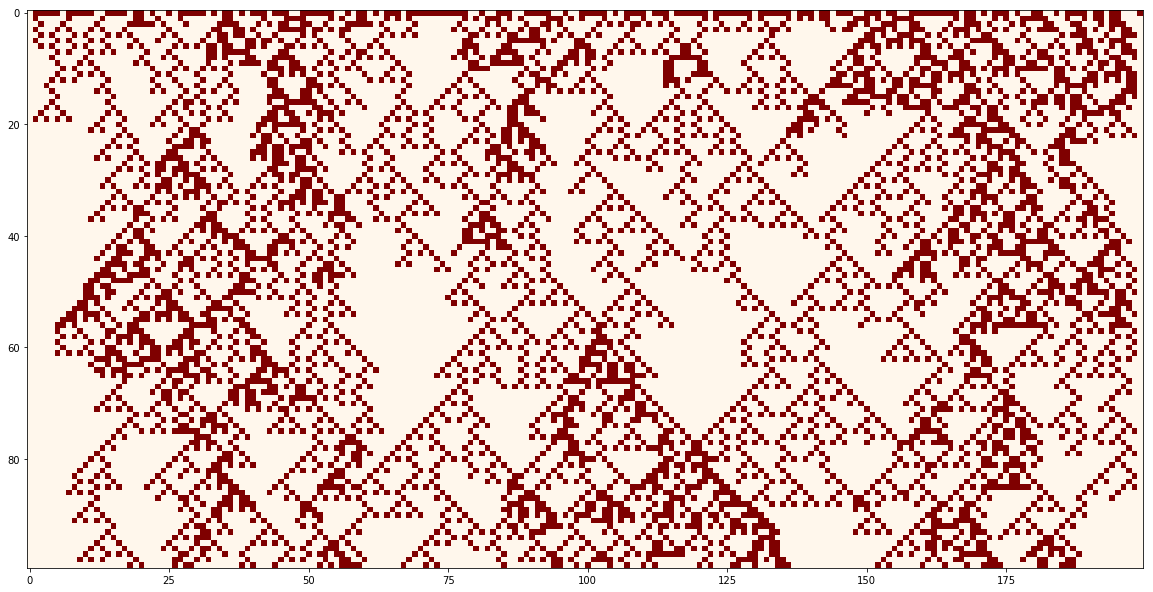

In [3]:
# Probabilistic Sierpinski triangles

N = 200
t = 100

field = np.zeros((t, N))
field[0, :] = np.random.choice([0,1],  size=N, p=[1/3, 2/3])

for i in range(0, t - 1):
    for x in range(1, N - 1):
        random_prob = rd.uniform(0, 1)
        if random_prob > 0.2:      # larger values usually lead to a small tree. where lays p_c and why?
            field[i+1, x] = bool(field[i, x-1]) ^ bool(field[i, x+1]) #logical XOR

plt.figure(figsize=(20,20))
plt.imshow(np.clip(field, a_min=0, a_max=1), cmap="OrRd")
plt.show()
#plt.savefig('sierpinski_automaton.png', dpi=300, format='png')

In [4]:
# Routine to receive the 'percolation probability'

p = [0.45, 0.55, 0.65, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.9, 0.99]
p_cutoff = 0.4

def t_dependence(array):
    
    i = 0
    while array[i] < p_cutoff:
        i += 1
        
    # compute the 'exact' position of the intersection
    
    slope = (array[i]-array[i-1]) / (p[i]- p[i-1])
    #0.4 = slope*x + a[i-1] - slope*p[i-1]
    intersection = (p_cutoff - array[i-1] + slope*p[i-1]) / slope
        
    return intersection

def testfunction(t, iterations, p):
    
    N = t
    
    counts = []
    
    for k in range(len(p)):
    
        counter = 0

        for l in range(iterations):

            field = np.zeros((t, N))
            field[0, :] = np.random.choice([0,1],  size=N, p=[1/3, 2/3])

            for i in range(0, t - 1):
                for x in range(1, N - 1):
                    random_prob = rd.uniform(0, 1)
                    if random_prob < p[k]:      # larger values usually lead to a small tree. where lays p_c and why?
                        field[i+1, x] = bool(field[i, x-1]) ^ bool(field[i, x+1]) #logical XOR
            if np.sum(field[-1,:]) > 0:
                counter += 1

        counts.append(counter)
        #print(k+1, " of ", len(p))
    
    plt.imshow(field, cmap="OrRd")  # plot field to show number of 'steps'
    plt.show()
    
    return [x / iterations for x in counts], t_dependence([x / iterations for x in counts])

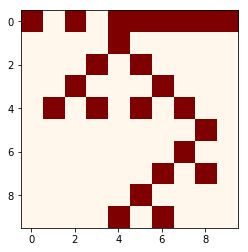

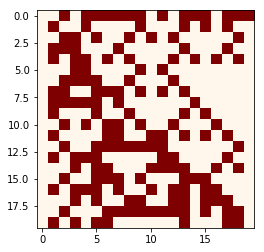

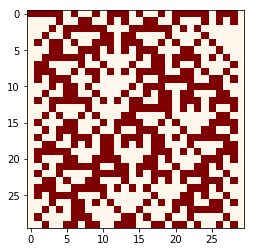

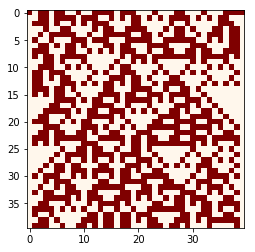

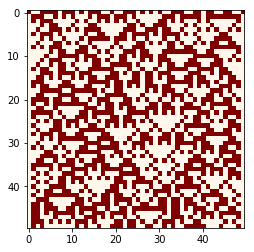

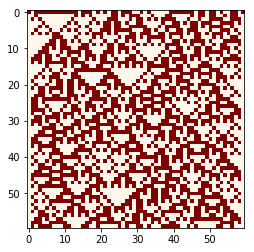

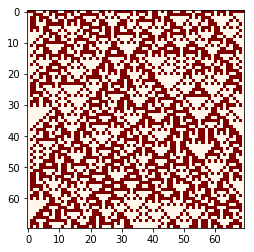

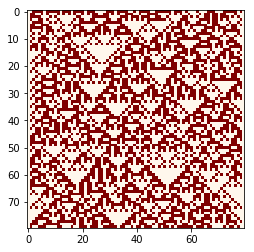

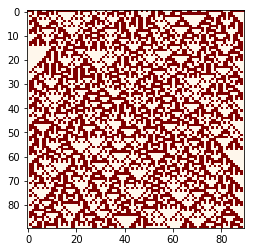

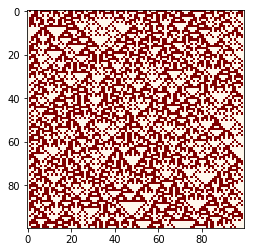

In [5]:
# Evaluation of test function

length = 10
T = np.linspace(10,100,length,dtype="int")

numberOFiters = 200

normCounts = []
for j in range(len(T)):
    normCounts.append(testfunction(T[j], numberOFiters, p))

(0, 1)

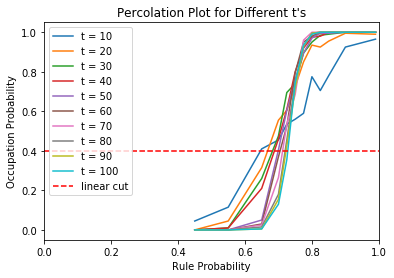

In [6]:
# Percolation plot I
for i in range(length):
    plt.plot(p,normCounts[i][0], label="t = {}".format(T[i]))

# plt p_cutoff
plt.plot([0,1],[p_cutoff, p_cutoff], label="linear cut", color="r", linestyle="dashed")

plt.title("Percolation Plot for Different t's")
plt.xlabel("Rule Probability")
plt.ylabel("Occupation Probability")
plt.legend()
plt.xlim([0,1])

Text(0,0.5,'Percolation Probability')

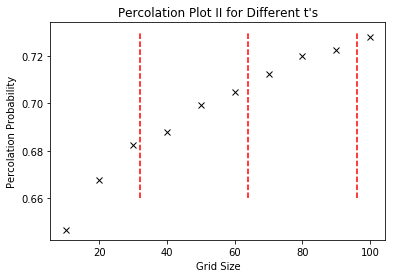

In [7]:
# Percolation plot II

for i in range(length):
    plt.plot(T[i],normCounts[i][1], 'x', color='black')
    
# show the cascades
plt.plot([32,32],[0.66,0.73], color="r", linestyle="dashed")
plt.plot([64,64],[0.66,0.73], color="r", linestyle="dashed")
plt.plot([96,96],[0.66,0.73], color="r", linestyle="dashed")

plt.title("Percolation Plot II for Different t's")
plt.xlabel("Grid Size")
plt.ylabel("Percolation Probability")

In [ ]:
##################### OLD plot, do not run again #####################################

# Normalize and plot results

normCounts = [x / iterations for x in counts]

print(counts)
plt.plot(p,normCounts)
plt.title("Percolation Plot")
plt.xlabel("Rule Probability")
plt.ylabel("Occupation Probability")
plt.xlim([0,1])
plt.show()
######################################################################################

The percolation probability for a randomly occupied [Archimedean square lattice](https://en.wikipedia.org/wiki/Percolation_threshold#Thresholds_on_Archimedean_lattices) amounts

$$
p_c \approx 0.59274
$$

which is - as intuitively expected - smaller than the critical probability modelled above

$$
p_{c,\text{Sierp.}} \approx 0.71\pm 0.02 > p_c
$$

for occupying the lattice according to a rule which only takes parts of the lattice.

One should keep in mind, that for (specific) rules it may be questionable, whether computing the percolation probability is meaningful or not. In this case this question arises from the 'steps' in the Sierpinski triangles (see first plot) as these larger steps are a 'bottleneck' for further generation of occupied lattice sites and therefore the percolation probability is expected to determine on the number of steps.

In [ ]:
# Rule 30

N = 300
t = 500

field = np.zeros((t, N))
field[0, :] = np.random.choice([0,1],  size=N, p=[1/3, 2/3])

for i in range(0, t - 1):
    for x in range(1, N - 1):
        if field[i, x-1]==1 and field[i, x]==1 and field[i, x+1]==1:
            field[i+1, x] = 0
        elif field[i, x-1]==1 and field[i, x]==1 and field[i, x+1]==0:
            field[i+1, x] = 0
        elif field[i, x-1]==1 and field[i, x]==0 and field[i, x+1]==1:
            field[i+1, x] = 0
        elif field[i, x-1]==1 and field[i, x]==0 and field[i, x+1]==0:
            field[i+1, x] = 1
        elif field[i, x-1]==0 and field[i, x]==1 and field[i, x+1]==1:
            field[i+1, x] = 1
        elif field[i, x-1]==0 and field[i, x]==1 and field[i, x+1]==0:
            field[i+1, x] = 1
        elif field[i, x-1]==0 and field[i, x]==0 and field[i, x+1]==1:
            field[i+1, x] = 1
        elif field[i, x-1]==0 and field[i, x]==0 and field[i, x+1]==0:
            field[i+1, x] = 0

plt.figure(figsize=(20,20))
plt.imshow(field, cmap="OrRd")
plt.show()
#plt.savefig('rule30_automaton.png', dpi=300, format='png')

In [ ]:
# Rule 30 probabilistic

N = 200
t = 100

field = np.zeros((t, N))
field[0, :] = np.random.choice([0,1],  size=N, p=[1/3, 2/3])

for i in range(0, t - 1):
    for x in range(1, N - 1):
        random_prob = rd.uniform(0, 1)
        
        # by giving different weight, one can crystallize out specific behaviour
        
        if random_prob > 0.3:
            if field[i, x-1]==1 and field[i, x]==1 and field[i, x+1]==1:
                field[i+1, x] = 0
        if random_prob > 0.25:
            if field[i, x-1]==1 and field[i, x]==1 and field[i, x+1]==0:
                field[i+1, x] = 0
        if random_prob > 0.7:
            if field[i, x-1]==1 and field[i, x]==0 and field[i, x+1]==1:
                field[i+1, x] = 0
        if random_prob < 0.3:
            if field[i, x-1]==1 and field[i, x]==0 and field[i, x+1]==0:
                field[i+1, x] = 1
        if random_prob < 0.7:
            if field[i, x-1]==0 and field[i, x]==1 and field[i, x+1]==1:
                field[i+1, x] = 1
        if random_prob > 0.05:
            if field[i, x-1]==0 and field[i, x]==1 and field[i, x+1]==0:
                field[i+1, x] = 1
        if random_prob < 0.9:
            if field[i, x-1]==0 and field[i, x]==0 and field[i, x+1]==1:
                field[i+1, x] = 1
        if random_prob > 0.1:
            if field[i, x-1]==0 and field[i, x]==0 and field[i, x+1]==0:
                field[i+1, x] = 0

plt.imshow(field, cmap="OrRd")
plt.show()
#plt.savefig('sierpinski_automaton.png', dpi=300, format='png')

All above presented examples are still synchronous examples. For more efficient structure generation use asynchronous ones by applying sets of rules.

In [ ]:
# Test Run asynchronous, still same time steps

N = 200
t = 100
nseeds = 10 # number of seeds

field = np.zeros((N, N))

for i in range(0, nseeds):
    # initialize seeds    
    field[rd.randrange(0,N-1), rd.randrange(0,N-1)] = 1

plt.imshow(field, cmap="OrRd")
plt.show()

# Apply rules similar to Game of Life rules
for i in range(0, 4):
    for j in range(0, int(t/4)):
        time = i*int(t/4)+j
        
        for x in range(1, N - 2):
            for y in range(1, N - 2):
                # if at least one neighbour on, have higher probability to be turned on
                if field[x, y-1]==1 or field[x, y+1]==1 or field[x-1, y]==1 or field[x+1, y]==1:
                    if rd.uniform(0, 1) < 0.2:
                        field[x, y] = 1
                
                # small probability to create life out of nowhere
                #if rd.uniform(0, 1) < 0.05:
                #    if field[x, y-1]==0 or field[x, y+1]==0 or field[x-1, y]==0 or field[x+1, y]==0:
                #        field[x, y] = 1
                
                # small probability to die randomly
                if rd.uniform(0, 1) < 0.15:
                    field[x, y] = 0
                    
    plt.imshow(field, cmap="OrRd")
    plt.show()
#plt.savefig('variation_game_of_life.png', dpi=300, format='png')

#### Notes

Distinguish:

- Passive self-assembly / static after creation (e.g. DNA Origami)
- Active nanostructures (e.g. DNA-based walkers, molecular motors)

##### Further ideas from the nubots paper

- gridless growth / development (also realisable via finer grid)
- translation (aka rotation rules)

In [ ]:
# 'sparse' grid

def circle(field, emptyfield, r):
    """
    Drawing a circle based on Pythagoras 
    
    """
    """for k in range(r):
        for l in range(r):
            if (k**2 + l**2 - r**2) < 0:
                # use symmetry properties of the circle while only computing one quarter
                field[x+k, y+l], field[x-k, y+l], field[x+k, y-l], field[x-k, y-l] = 1, 1, 1, 1
    """
    for i in range(len(field)):
        for j in range(len(field[0])):
            
            if field[i,j] == 1:
                
                for k in range(r):
                    for l in range(r):
                        
                        if (k**2 + l**2 - r**2) < 0:
                            # use symmetry properties of the circle while only computing one quarter
                            emptyfield[i+k, j+l], emptyfield[i-k, j+l] = 1, 1
                            emptyfield[i+k, j-l], emptyfield[i-k, j-l] = 1, 1                

d = 11
r = int(d/2)

N = d**2

field = np.zeros((N, N))
grid = np.zeros((N, N))
    
for i in range(0, int(N/d)):
    for j in range(0, int(N/d)):
        # initialize grid with 'real' lattice points
        grid[r+d*i,r+d*j] = 1

plt.imshow(grid, cmap="OrRd")
plt.show()

# Draw 'monomers' around their gridpoints
circle(grid, field, r)
        
plt.imshow(field, cmap="OrRd")
plt.colorbar()
plt.show()
        
#plt.savefig('sparse_grid.png', dpi=300, format='png')

The 'sparse' grid also allows for rotational alignment different than $k\cdot \frac{\pi}{4}$.

In [ ]:
# 'sparse' grid partly filled

d = 31
r = int(d/2)

N = d**2

field = np.zeros((N, N))
grid = np.zeros((N, N))
    
for i in range(0, int(N/d)):
    for j in range(0, int(N/d)):
        # initialize grid with 'real' lattice points, probabilistically filled
        if rd.uniform(0, 1) < 0.2:
            grid[r+d*i,r+d*j] = 1

plt.imshow(grid, cmap="OrRd")
plt.show()

# Draw 'monomers' around their gridpoints
circle(grid, field, r)
        
plt.imshow(field, cmap="OrRd")
plt.colorbar()
plt.show()
        
#plt.savefig('sparse_grid_partly.png', dpi=300, format='png')